# Filtering single effects by single effect logBF

Implemented as option `simple` to "estimate" prior variance, I simply set the effect zero if all logBF are smaller than zero. It helps removing false discoveries as shown in this notebook.

The example was identified from a DSC benchmark.

In [1]:
attach(readRDS('issue_12.rds'))

In [2]:
m_init = mvsusieR::create_mash_prior(mixture_prior = mixture_prior, null_weight=null_weight, max_mixture_len=-1)
r1 = mvsusieR::mvsusie(X, Y, L=L, prior_variance=m_init, residual_variance=resid_Y, compute_objective=F, estimate_residual_variance=F)

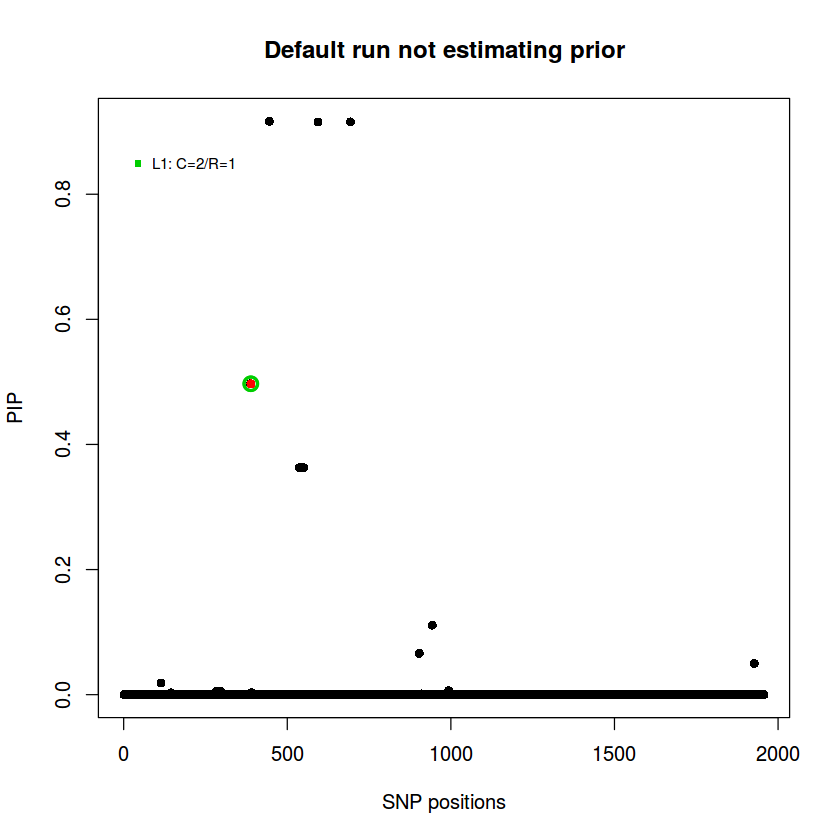

In [3]:
susieR::susie_plot(r1,y='PIP', main = 'Default run not estimating prior', xlab = 'SNP positions', add_legend = T, b=true_pos)

Although the first effect captures the true signal, the additional false effects have non-trivial PIP.

Now using the `simple` method setting prior variance to zero, if logBF for every variable is negative:

In [9]:
r2 = mvsusieR::mvsusie(X, Y, L=L, prior_variance=m_init, residual_variance=resid_Y, compute_objective=F, estimate_residual_variance=F, estimate_prior_variance=T, estimate_prior_method='simple')

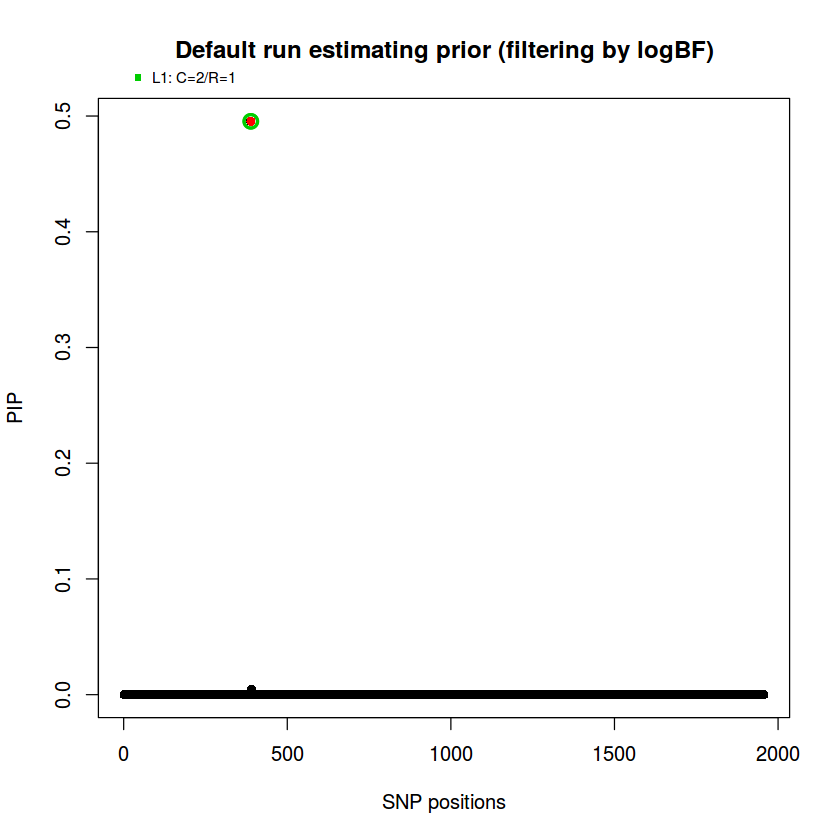

In [10]:
susieR::susie_plot(r2,y='PIP', main = 'Default run estimating prior (filtering by logBF)', xlab = 'SNP positions', add_legend = T, b=true_pos)

Same SNP was captured for the first effect but the result is much cleaner.

In [11]:
r2$V

[1] 1 0 0 0 0 0 0 0 0 0

## logBF diagnosis

The original logBF:

In [12]:
r1$lbf

[1] 52.572064 -9.653722 -9.654434 -9.654837 -9.654879 -9.654608 -9.654141
 [8] -9.653627 -9.653215 -9.653024

In [13]:
r2$lbf

[1] 49.50394  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [9]  0.00000  0.00000

Here I temporarily print lbf for each multivariate computation, for one iteration:

In [18]:
devtools::load_all("~/GIT/software/mvsusieR")

Loading mvsusieR


In [19]:
r3 = mvsusie(X, Y, L=L, prior_variance=m_init, residual_variance=resid_Y, compute_objective=F, estimate_residual_variance=F, max_iter=1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -19.41  -17.91  -16.71  -15.02  -15.23   56.38 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.754 -18.451 -17.592 -17.328 -16.605  -3.467 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -19.74  -18.46  -17.60  -17.34  -16.61   -3.48 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.730 -18.466 -17.617 -17.341 -16.614  -3.489 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.718 -18.464 -17.620 -17.344 -16.618  -3.494 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.707 -18.463 -17.621 -17.347 -16.617  -3.497 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.698 -18.462 -17.623 -17.349 -16.622  -3.499 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -19.69  -18.46  -17.62  -17.35  -16.63   -3.50 
[1] "===="
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-19.695 -18.460 -17.626 -17.353 -16.626  -3.501 
[1] "===="
   Min. 1st Qu.  Me

As shown above, apart from the first effect that captures the true signal the other effects have negative yet different `lbf` that clearly can result in false signals.